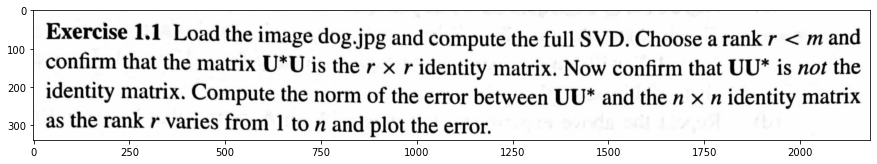

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,5))
plt.imshow(imread('./ex1.1.png'));

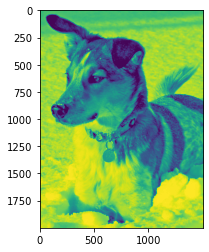

In [81]:
DOG = imread('/Users/Saizt/Documents/USA/UH/Courses/Pattern Recognition (MATH 6397)/databook_python/DATA/dog.jpg')
DOG = np.mean(DOG, -1)
plt.imshow(DOG);

In [82]:
U, S, VT = np.linalg.svd(DOG, full_matrices=True)
S = np.diag(S)

In [83]:
r = U.shape[0] - VT.shape[0]
print('r =',r)

r = 500


In [84]:
#It's the identity matrix
np.linalg.inv(U[:r,:r]) @ U[:r,:r]

array([[ 1.00000000e+00,  7.70938868e-13,  6.11199980e-12, ...,
         7.92965693e-12,  1.22355459e-11, -3.09796633e-12],
       [ 3.30890870e-12,  1.00000000e+00,  5.29531974e-12, ...,
         7.90123522e-12,  9.66338121e-12, -3.48165941e-12],
       [-3.94129174e-13,  2.52176058e-12,  1.00000000e+00, ...,
        -1.03028697e-12, -1.02460262e-11,  5.81934501e-12],
       ...,
       [-6.23112673e-15, -1.36696210e-14, -2.54726795e-14, ...,
         1.00000000e+00, -9.54791801e-15, -1.88737914e-15],
       [-2.93098879e-14, -9.57567359e-15, -5.57887070e-14, ...,
         1.24344979e-14,  1.00000000e+00,  3.64153152e-14],
       [-2.57016630e-14, -6.66133815e-16, -3.89688282e-14, ...,
         9.99200722e-15,  6.88338275e-15,  1.00000000e+00]])

In [72]:
#It's still the identity matrix...
U[:r,:r] @ np.linalg.inv(U[:r,:r])

array([[ 1.00000000e+00, -3.43058915e-14, -8.70414851e-14, ...,
         2.22044605e-14, -1.40998324e-14,  4.71844785e-15],
       [-1.29896094e-14,  1.00000000e+00,  1.33226763e-15, ...,
         2.64233080e-14, -1.44884105e-14, -6.93195501e-15],
       [-1.23234756e-14, -3.55271368e-15,  1.00000000e+00, ...,
         5.13478149e-14, -1.03250741e-14,  2.77555756e-15],
       ...,
       [ 1.17406085e-14, -7.47180096e-14, -9.19264664e-14, ...,
         1.00000000e+00, -2.75057754e-14,  2.38697950e-15],
       [-1.55431223e-15,  4.77395901e-14, -8.73745520e-14, ...,
        -9.99200722e-15,  1.00000000e+00, -7.66053887e-15],
       [ 0.00000000e+00, -8.88178420e-16, -4.21884749e-15, ...,
         1.55431223e-15, -7.88258347e-15,  1.00000000e+00]])

In [57]:
loss = [np.linalg.norm(U[:r,:r] @ np.linalg.inv(U[:r,:r]) - np.eye(r)) for r in range(U.shape[0])]

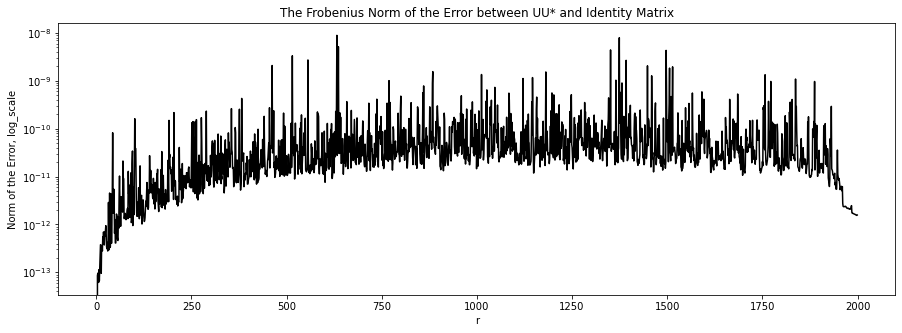

In [73]:
plt.figure(figsize=(15,5))
plt.title('The Frobenius Norm of the Error between UU* and Identity Matrix')
plt.xlabel('r')
plt.ylabel('Norm of the Error, log_scale')
plt.yscale('log')
plt.plot(loss, color='black');

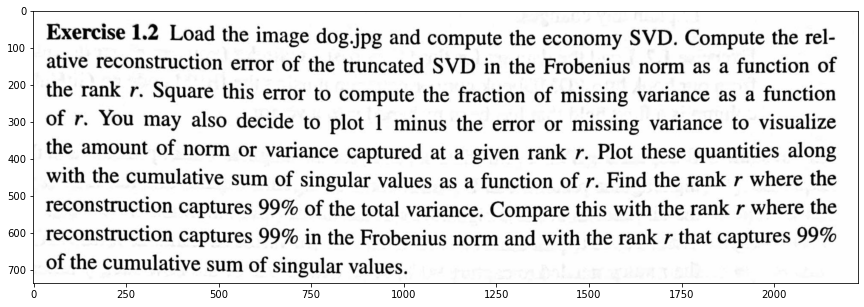

In [9]:
plt.figure(figsize=(15,5))
plt.imshow(imread('./ex1.2.png'));

In [85]:
U_ec, S_ec, VT_ec = np.linalg.svd(DOG, full_matrices=False)
S_ec = np.diag(S)

In [131]:
def rel_reconstruction_errror(image, U,S,VT, r, prints=True):
    er = abs(np.linalg.norm(U[:r,:r] @ np.diag(S)[:r,:r] @ VT[:r,:r])/np.linalg.norm(image) - 1)
    if prints:
        print('For truncation at r =', r)
        print('The Relative reconstruction error =', er)
        
    return er

test = rel_reconstruction_errror(DOG, U_ec, S_ec, VT_ec, 1)

For truncation at r = 1
The Relative reconstruction error = 0.9993040957251453


In [132]:
print('Fraction of missing variance = ', test**2)

Fraction of missing variance =  0.9986086757330505


In [134]:
test = [rel_reconstruction_errror(DOG, U_ec, S_ec, VT_ec, r, prints=False) for r in range(len(S_ec))]

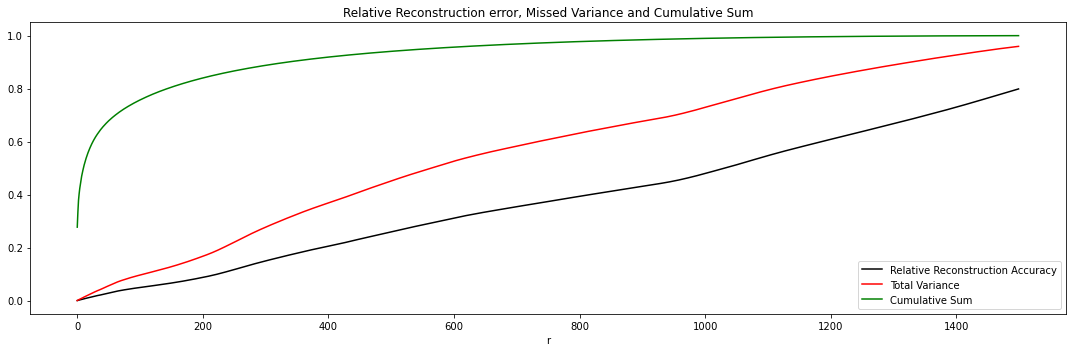

In [192]:
plt.figure(figsize=(15,5))

plt.title('Relative Reconstruction error, Missed Variance and Cumulative Sum')
plt.xlabel('r')
plt.plot(1-np.array(test), color='black', label='Relative Reconstruction Accuracy')
plt.plot(1-np.array(test)**2, color='red', label='Total Variance')
plt.plot(np.cumsum(S_ec)/sum(S_ec), color='green', label='Cumulative Sum')
plt.legend();

plt.tight_layout()

So, as we can see, 99% of cumsum approaches at r approximately equals to 1006

However, at the same r we get only about 75% total variance, we need to take r up to 1400-1500 in order to get 99%

The Relative Reconstruction Accuracy even can't approach to 99%

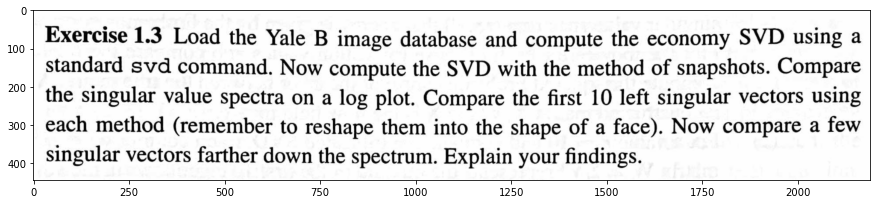

In [10]:
plt.figure(figsize=(15,5))
plt.imshow(imread('./ex1.3.png'));

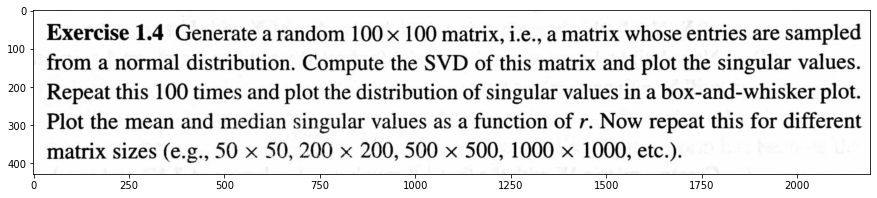

In [11]:
plt.figure(figsize=(15,5))
plt.imshow(imread('./ex1.4.png'));